### Assessment 1 - GEOGM0068: Geographic Information Retrieval and Integration

##### student name: Jia Zhao
##### student id: 2472581

# Preliminarily explore outliers and the linear relationship between variables and popularity

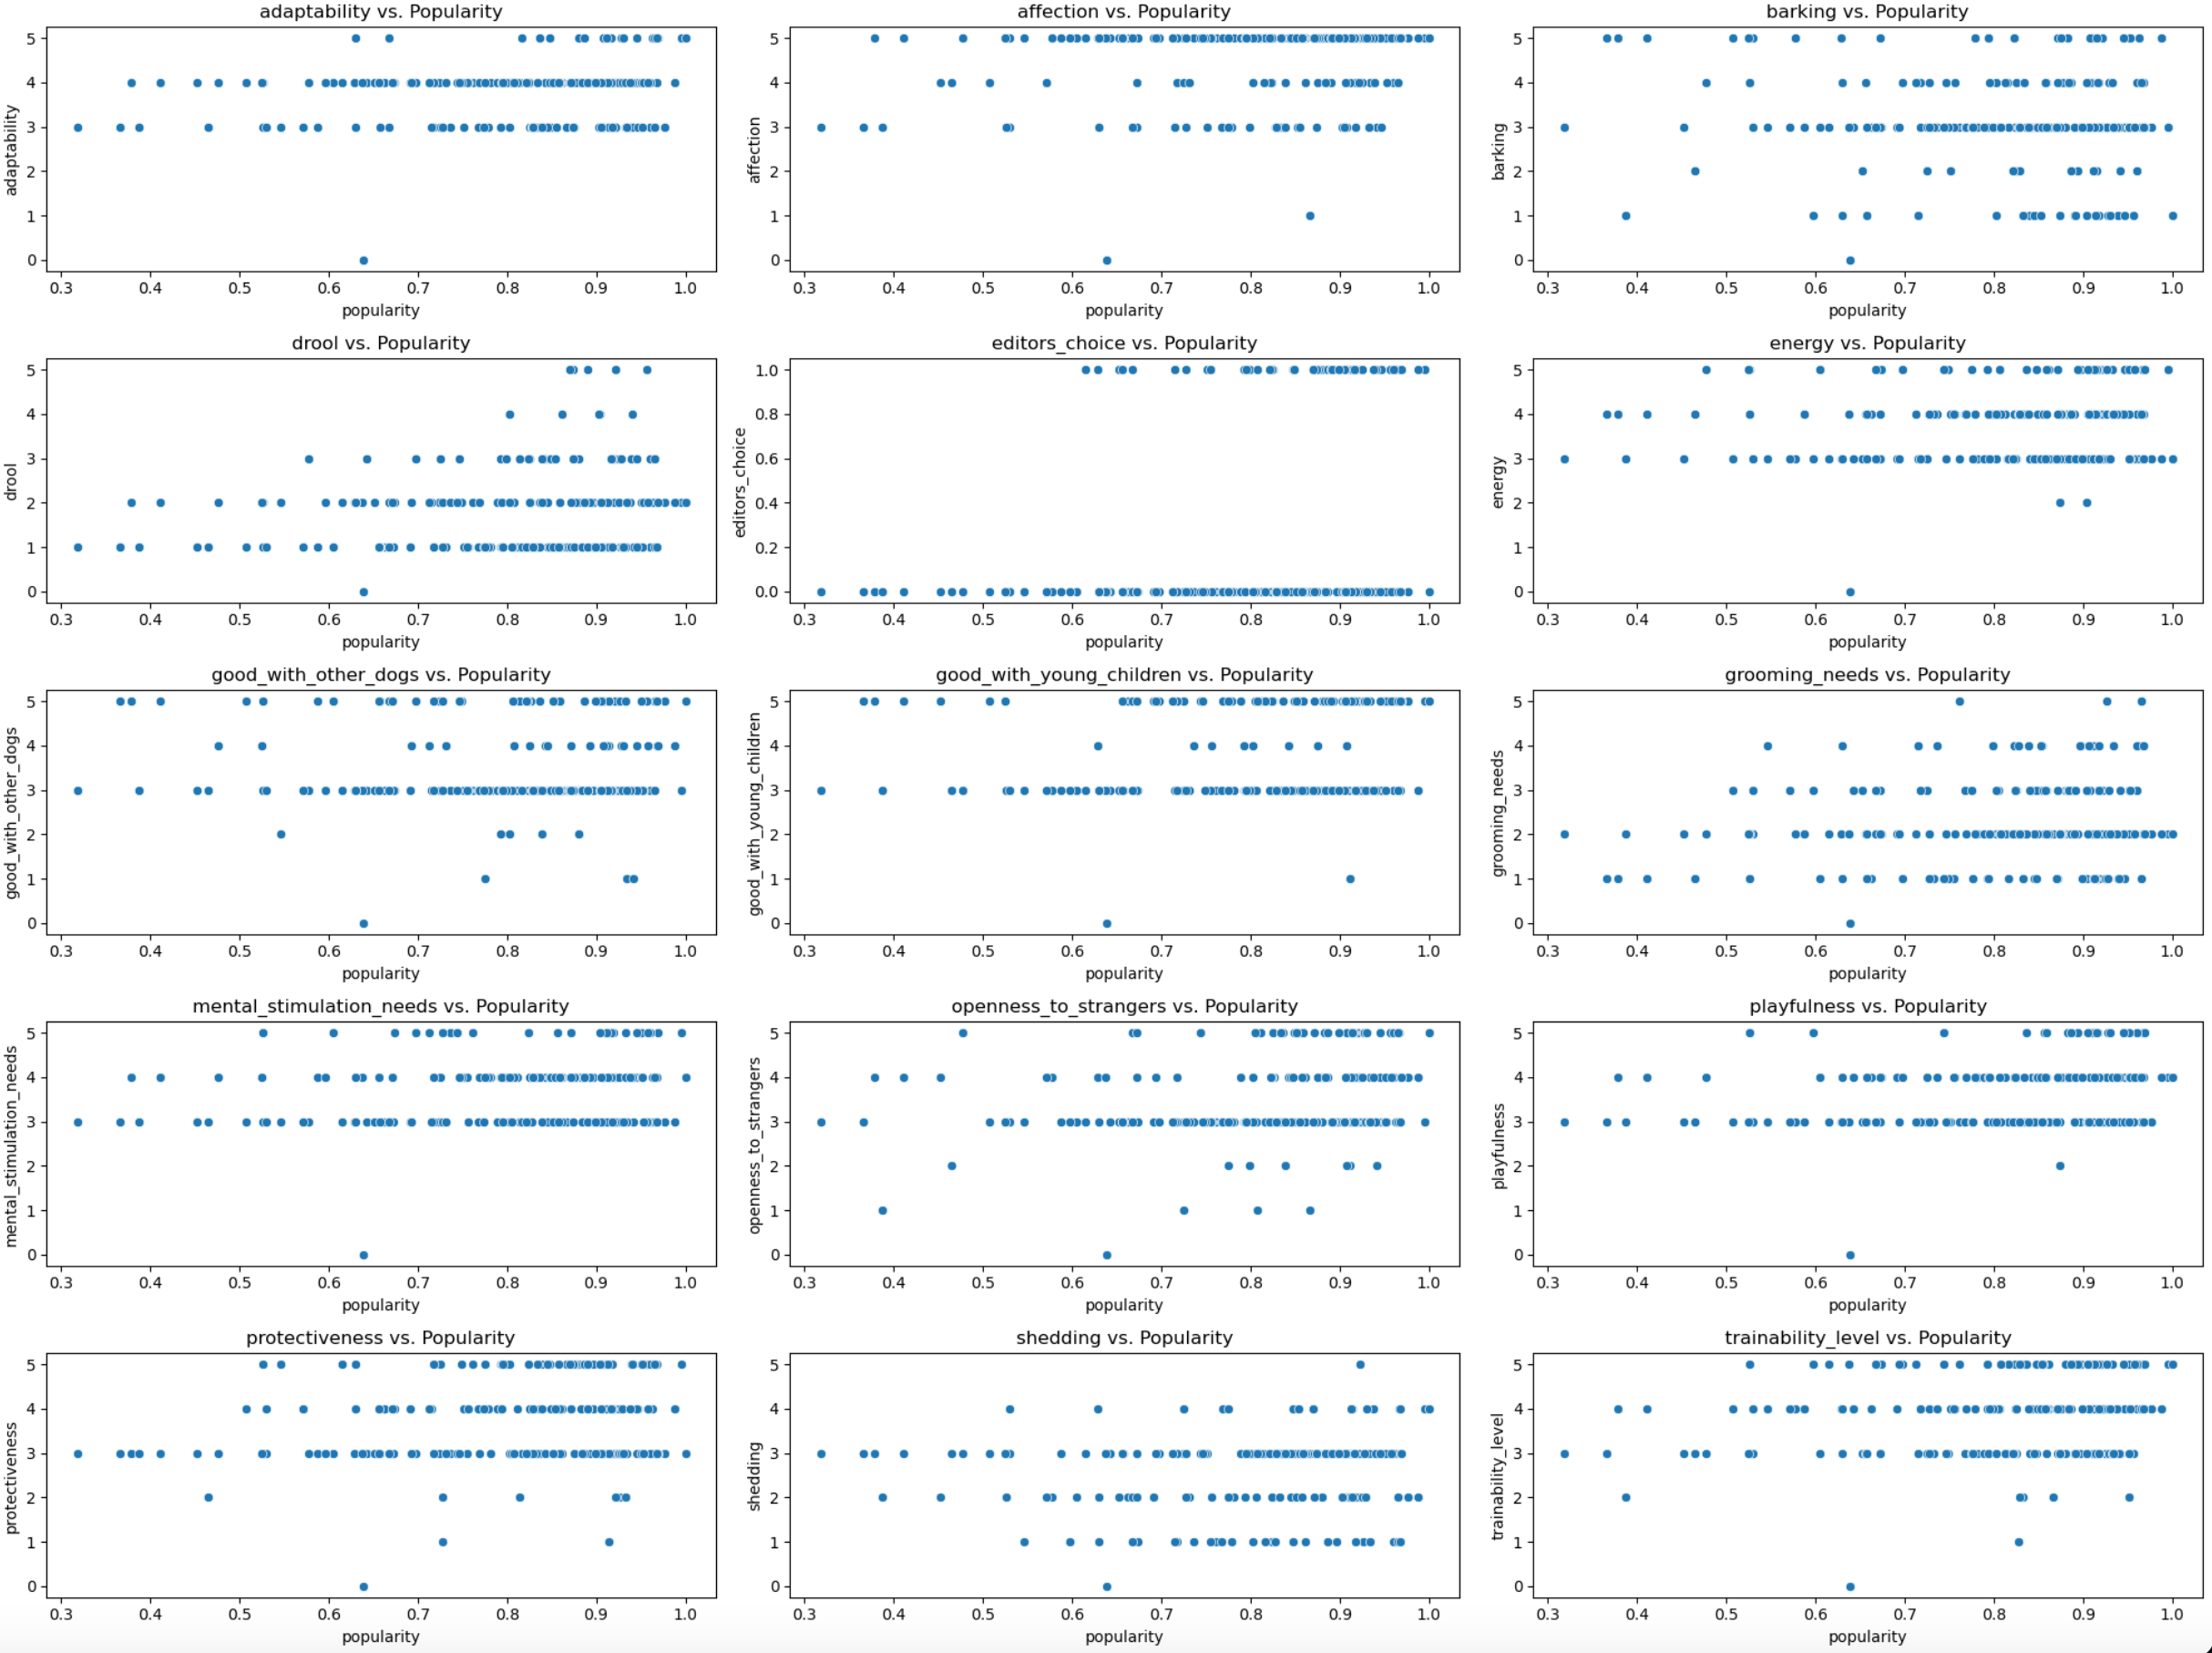

The dataset has 194 rows and 19 columns.

According to the scatter plot, we can have a general impression of the subsequent data regression analysis:

- Small data set: means limited information to do modelling
- Limited scope of variables: Numeric type variables have no outliers and are all in the range of 1-5(discontinuous variable), may not be suitable for use with strictly linear models
- Although the ranges are all 1-5, the numerical distributions of different variables are still very different.
- There are currently no obvious linear relationship between the independent variables and the dependent variable (popularity) from Scatter plot
- No outliers

# 1. Regression

##### What are the most important factors governing the popularity of a dog breed?

### Regression 1a

`basic_features = dogs.drop(columns=['popularity', 'coat_type', 'coat_length', 'breed_clean'])`

##### Step 1 K-fold cross-validation

At the beginning of Regression 1a, I used k-fold cross-validation to test what kind of results would be obtained using linear regression modeling on this data set.
The result is as follows:
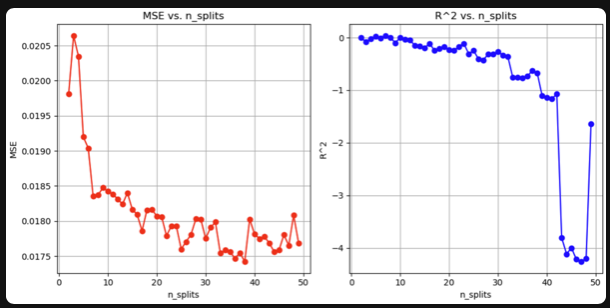

When n_splits < 10, the difference (error) between the model's predicted and actual values is small (mse is close to 0), but the model does not explain the variability of the target variable in the data well (R^2 is close to 0). In other words, although the model appears to make relatively accurate predictions numerically, it fails to capture the main patterns or relationships in the data.

##### Step 2 Split the training set and experimental set

After distinguishing the experimental set and the test set, I used the linear regression model`test_size=0.33, random_state=42` and found that the model performance was worse (MSE became larger and R^2 was negative):

- `basic_Linear_mse: 0.02814579353849687`
- `basic_Linear_r2: -0.23129344385506756`
  
Based on this, some simple conclusions can be drawn:
- When using train_test_split for a single data split, this random splitting of small data sets may lead to uneven data distribution in the training set and test set, especially when the amount of data is not large or the data distribution is uneven. This may cause the rules learned by the model on the training set not to be applicable to the test set, affecting the generalization ability of the model.
- K-fold cross-validation provides more stable and reliable performance estimates. This reduces dependence on a specific way of splitting the data.
- The negative number of R^2 also depends on the proportion of the test set. When the proportion of the test set is `0.25`, both MSE and R^2 perform better.

When we use various random seeds for Linear regression, we will find that the changes in `MSE` and `R^2` are relatively drastic, indicating that the stability and generalization ability of this data set without linear regression before feature engineering are average.

- Random State: 0, MSE: 0.019830867317717105, R^2: 0.19911970614847685
- Random State: 42, MSE: 0.02814579353849687, R^2: -0.23129344385506756
- Random State: 100, MSE: 0.02379996688973473, R^2: 0.14078709703270997
- Random State: 2000, MSE: 0.022782667794208834, R^2: 0.05682423157989214
- Random State: 10000, MSE: 0.01779427597514868, R^2: -0.06829120142525746

##### Step 3 Bagging model

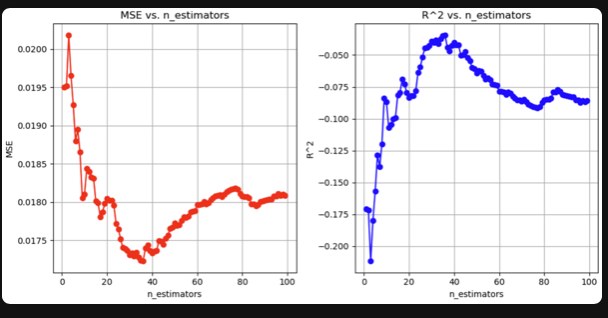

Also using `test_size=0.33, random_state=42`

Compared with the k-fold test results, the bagging model has better MSE and worse R^2: 
- In k-fold cross-validation, all data points are used as experimental sets and test sets, which has better utilization of small data sets.
- However, bagging will split the entire data set into the experimental set and the test set, which may help with the optimization of MSE.

### Regression 1b

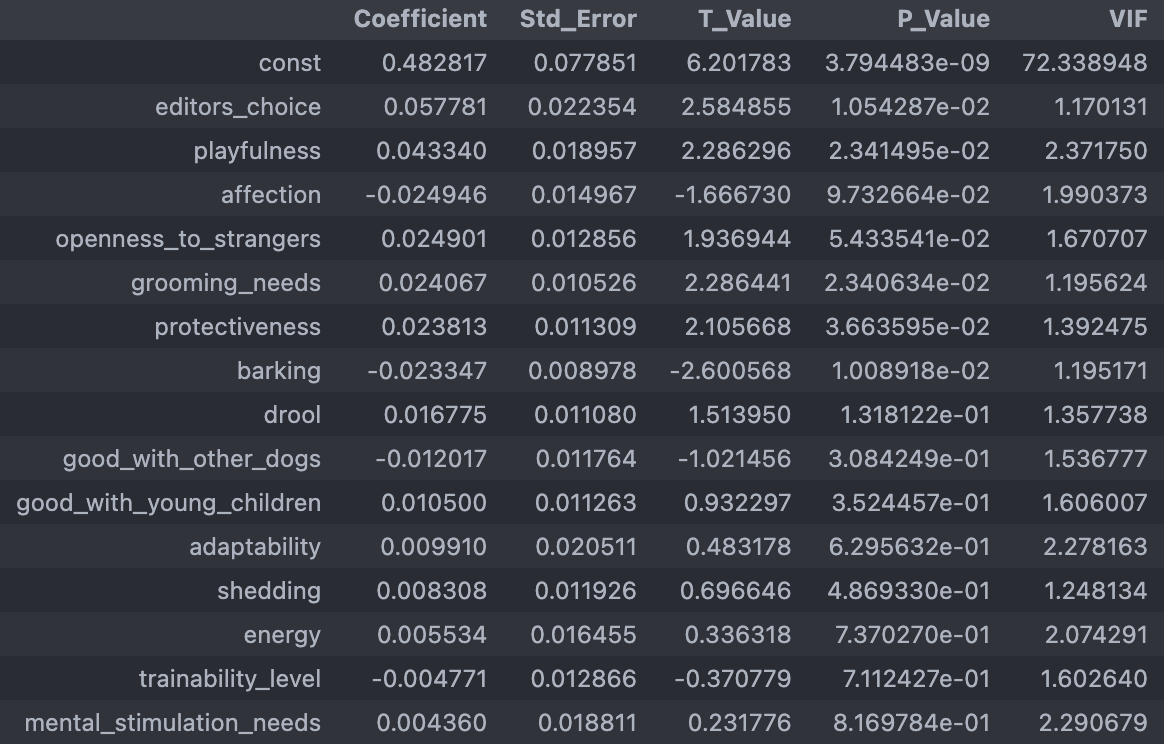
In this step, I add a constant const to make the regression line more flexible. 

According to the results, the following are useful features: 
`'editors_choice', 'playfulness', 'affection', 'protectiveness', 'grooming_needs', 'openness_to_strangers', 'barking'`

At the same time, we can also find from other results:
- Large absolute t-values ​​and small p-values ​​(variables above barking) show that the coefficient is significantly different from 0
- A lower VIF value indicates that multicollinearity among variables is not a deal

### Regression 1c

`Useful_feature = dogs[['editors_choice', 'playfulness', 'affection', 'protectiveness', 'grooming_needs', 'openness_to_strangers', 'barking']]`

Useful_feature seems to improve model performance:
- `useful_features_Linear_mse: 0.024668107102008594`
- `useful_features_Linear_r2: -0.0791551677331006`

In comparison(both random_state=42):
- `basic_Linear_mse: 0.02814579353849687`
- `basic_Linear_r2: -0.23129344385506756`

But the performance of the bagging model is even worse

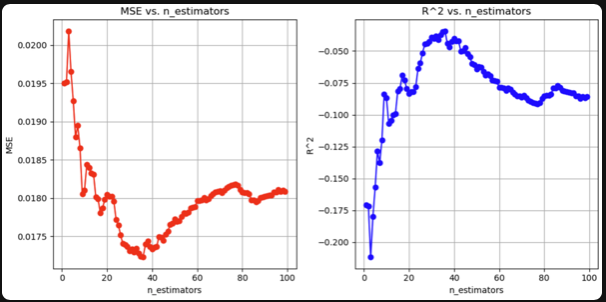


### Regression 1d (challenge)

The lowest value for The MSE for Terrier breeds indicates that the model is not biased against terriers. In fact, the model may be more accurate for terrier breeds than for non-terrier breeds shows the  shows that the model is not biased against terriers; in fact, the model may be more accurate for terrier breeds than for non-terrier breeds.

- `The MSE without 'is_terrier': 0.01743755714545456`
- `The MSE for Terrier breeds: 0.0028118299906608165`
- `The MSE for non-Terrier breeds: 0.020422399421943085`

### Regression 2a and Regression 2b

Finding the best hyperparameters of random forest through `GridSearchCV` and using only the useful features from Regression 1b, the results are as follows:
- `RandomForest_1b_MSE: 0.022823325324433465,`
- `RandomForest_1b_r2: 0.0015484622770007839`
 
The parameters:`'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5,'n_estimators': 100`. There is an unidentified question here:  Is `n_estimators = 100` too big for this data set?

Compared with `useful_features_Linear_mse: 0.024668107102008594 & useful_features_Linear_r2: -0.0791551677331006`, model performance improved

the “good” predictors in this random forest: 

| Feature                     | Importance |
|-----------------------------|------------|
| playfulness                 | 0.190943   |
| barking                     | 0.168489   |
| drool                       | 0.091352   |
| grooming_needs              | 0.087373   |
| protectiveness              | 0.082193   |
| shedding                    | 0.056145   |
| openness_to_strangers       | 0.044959   |
| editors_choice              | 0.040763   |
| adaptability                | 0.040555   |
| good_with_young_children    | 0.039649   |
| mental_stimulation_needs    | 0.039553   |
| energy                      | 0.033875   |
| trainability_level          | 0.031752   |
| good_with_other_dogs        | 0.031240   |
| affection                   | 0.021160   |

which are different from linear model: `'editors_choice', 'playfulness', 'affection', 'protectiveness', 'grooming_needs', 'openness_to_strangers', 'barking'`

### Regression 2c (challenge)

When we break down performance based on whether a breed is a terrier or not, the regression forest modeling results are:
- `The MSE without 'is_terrier': 0.01967095329756556`
- `The MSE for Terrier breeds: 0.010678829702642948`
- `The MSE for non-Terrier breeds: 0.021918984196296218`

These results suggest that the model is actually more accurate (i.e., has a lower error) for Terrier breeds than for non-Terrier breeds in predicting their popularity.
Thus, rather than exhibiting bias against Terriers, the model appears to predict Terrier popularity with slightly better accuracy.

### Regression 3a

- Feature Space Complexity: KNN works by finding the closest training examples in the feature space. If the factors governing dog breed popularity are high-dimensional and not easily separable (e.g., temperament, adaptability), finding meaningful neighbors could be difficult without a very dense dataset.

- Non-Linearity of Influences: The relationship between the factors and the popularity might be highly non-linear or interactive in ways that KNN, with its simplistic approach based on proximity in feature space, might not capture well.

- Variable Importance: Not all factors are equally important in determining breed popularity, but KNN treats all dimensions equally unless weighted distances are explicitly used. This can dilute the influence of the most critical features.

- Aspect of the Question: The question itself seeks to understand complex, multifactorial influences on breed popularity, which may involve understanding underlying patterns, trends, and interactions. KNN is a relatively simple algorithm that might not provide the depth of insight needed to fully understand these dynamics.
  
### Regression 3b and Regression 3c (challenge)

Traverse k from 1-20 and `weights='distance'`, the KNN’s out-of-sample mean squared error and R^2: 
- `KNN_MSE: 0.02322163311529396`
- `KNN_R^2: -0.0158763003558994861`
- `k = 4`

Compared with: 
- `useful_features_Linear_mse: 0.024668107102008594`&`useful_features_Linear_r2: -0.0791551677331006`
- `RandomForest_1b_MSE: 0.01886472583859312`&`RandomForest_1b_r2: 0.17472523155502773`

Performance of KNN is slightly better than linear regression

### Regression 4

`'playfulness', 'affection', 'protectiveness', 'barking'`are the most important features governing the popularity of a dog breed, because they are both in the top 6 importance evaluations of linear regression and random forest.

I am not confident that my random forest model can make valid predictions for popularity scores from Modern Dog: When the training set ratio is 0.33, the random forest modeling result is:
- `RandomForest_1b_MSE: 0.022823325324433465 & RandomForest_1b_r2: 0.0015484622770007839`
- `RandomForest_2b_MSE: 0.023213770524371808 & RandomForest_2b_r2: -0.015532335754548932`

Although such R^2 is acceptable for small data sets and the MSE of the model is very close to 0, the performance dropped slightly after using the features obtained in 2b, which makes me not confident in my model.

# 2. Classification
How can you tell if a dog is an “Editor’s choice?”

### Classification 1a

Decision tree can get the best hyperparameters without using grid:
- `tree_depth = 4`
- `num_leaves = 10`

Also, the result of the performance evaluation: 
- `Accuracy: 78.46%` - Indicates that the model correctly predicted approximately 78% of the samples.
- `Recall: 14.29%` - The model correctly identified only about 14% of all samples that were actually positive.
- `Precision: 50%` - Half of the samples that the model predicts as positive are correct.
- `F1 Score: 22.22%` - This is a weighted average of precision and recall, indicating that the model has low balanced performance on these two metrics.

These results show that although the accuracy of the model is relatively high, the recall is very low, indicating that the model does not perform well in identifying positive classes (editors_choice = 1). On the other hand, an accuracy of 50% means that the model has some accuracy in predicting positive classes, but there is still a lot of room for improvement. The low F1 score further emphasizes the model's lack of balance between precision and recall.

### Classification 1b

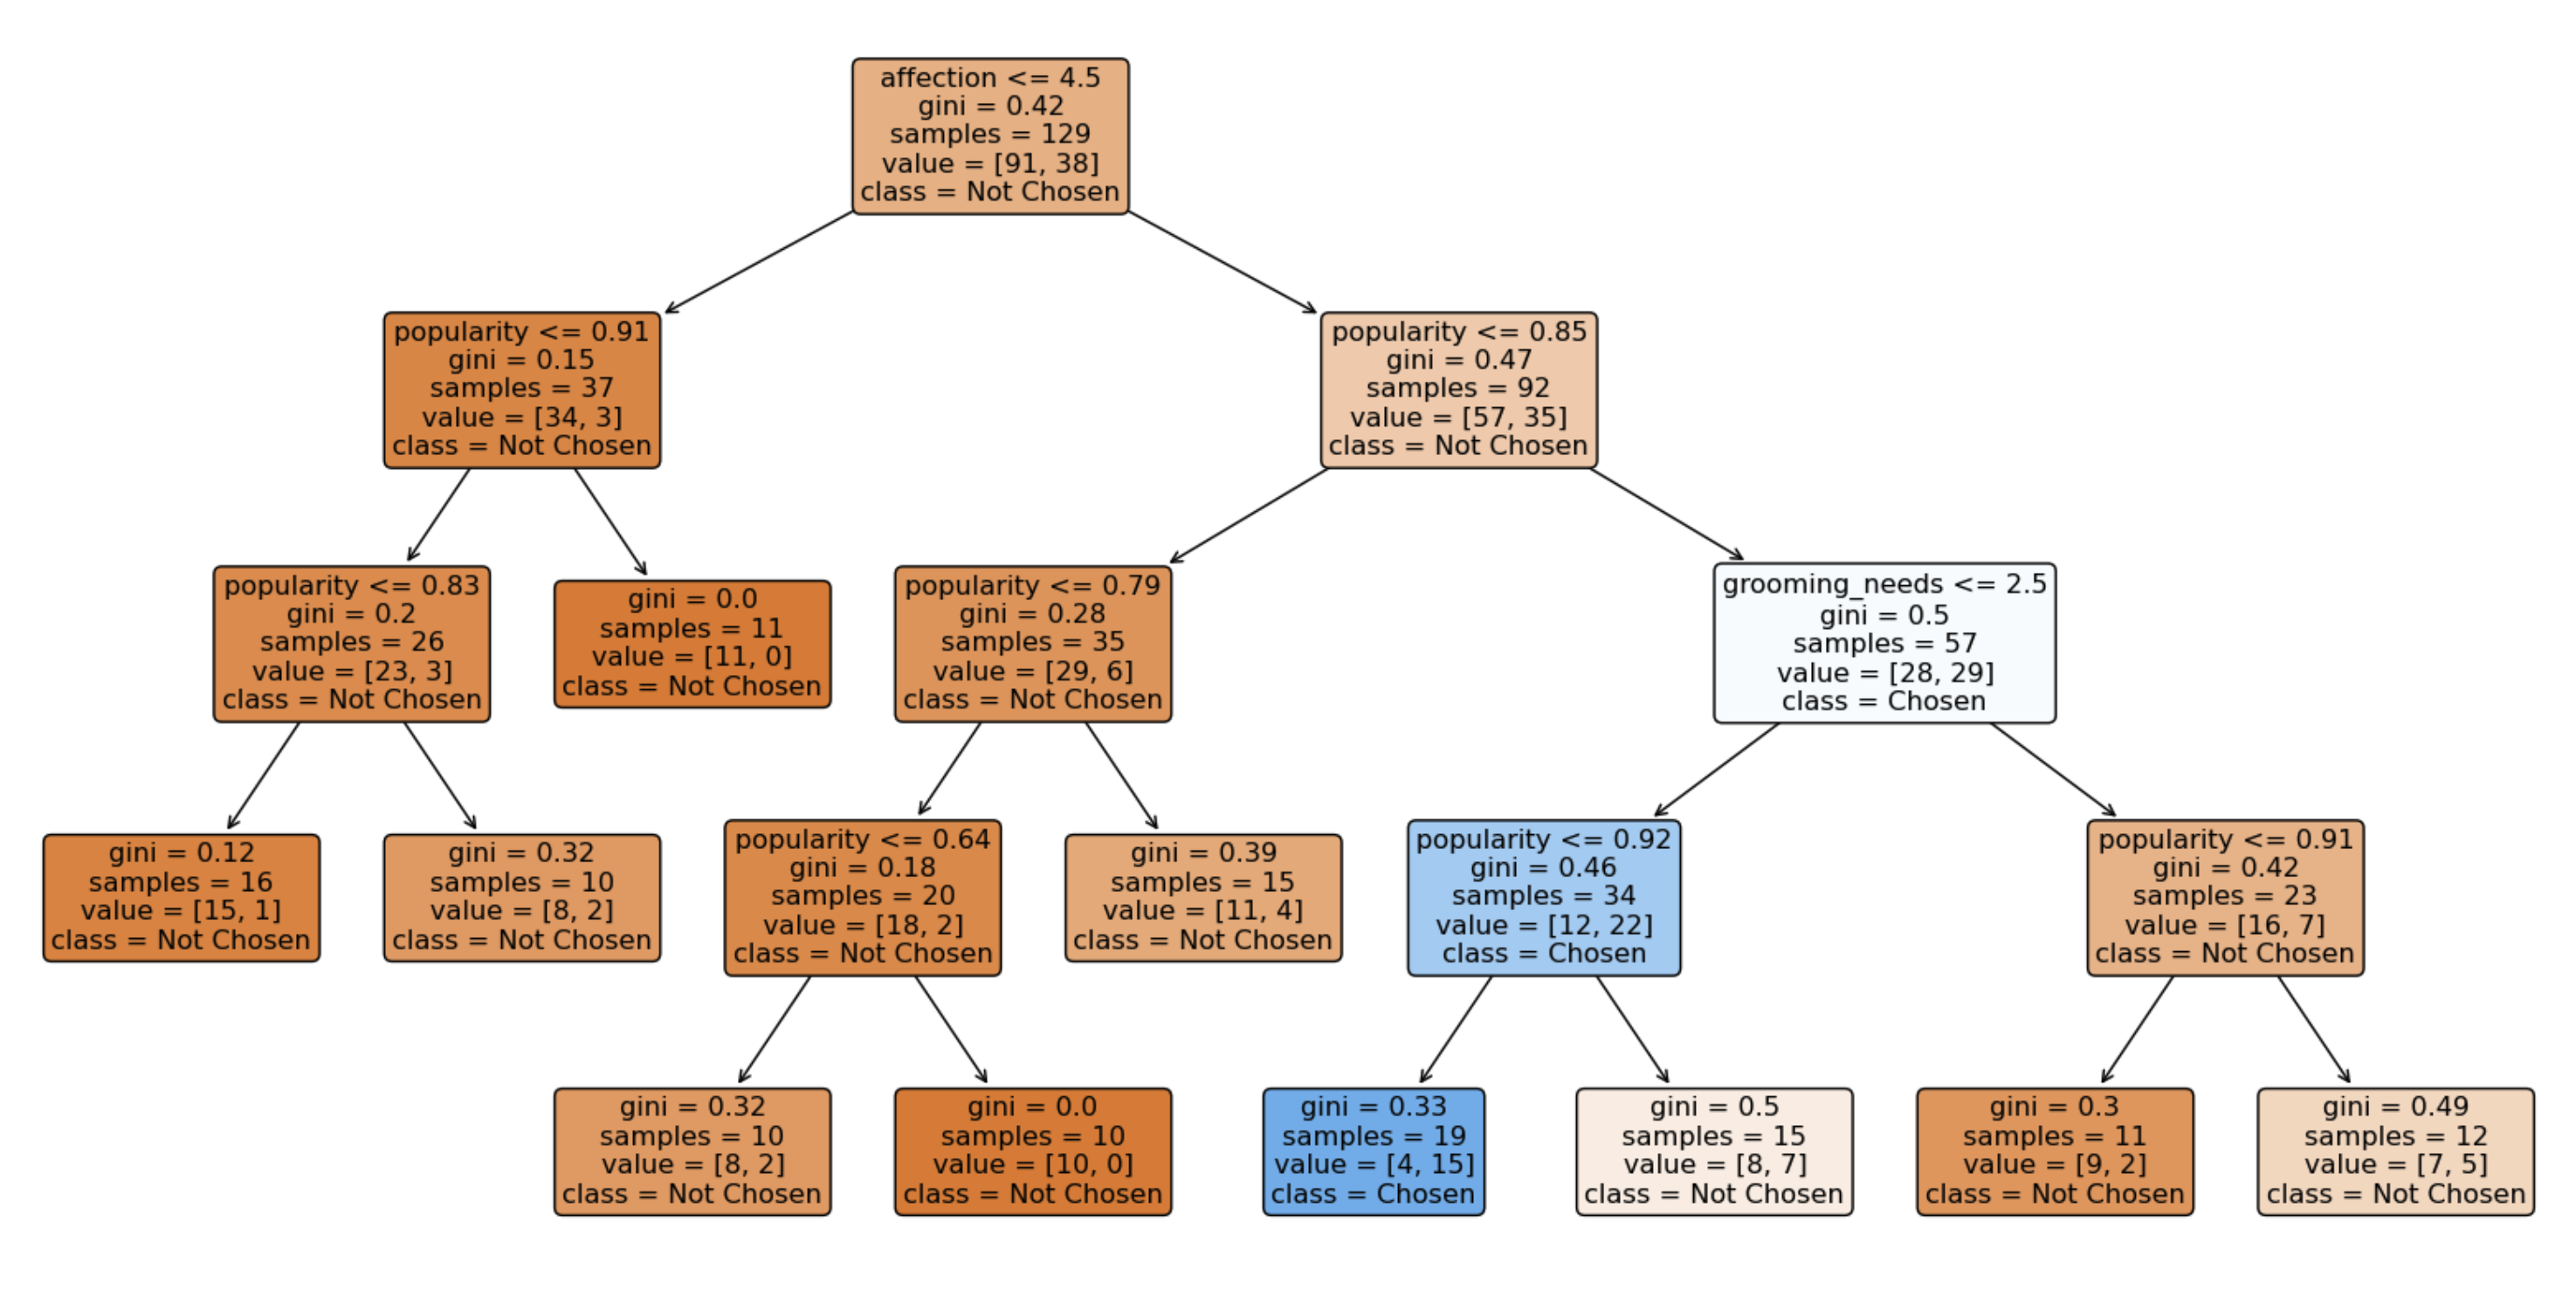

- The decision tree has been optimally split at each node

1. The decision at the root involves the feature "affection": `split node: 4.5`.
2. then the feature "popularity": `split node: 0.85`, I chose this side because it has a higher `gini`.
3. The 3rd decision involves "grooming_needs": `split node: 2.5`, and this decision also splits the current collection more evenly.
4. Finally, the ends of the decision tree are branches with 'popularity' of 0.92 and 0.91, judging from their respective Gini coefficients:
    - After the `0.92` and `0.91` splits, the Gini impurities were reduced, from 0.46 to 0.33 and 0.5, which means that the splits help purify the nodes, but are also accompanied by rising leaves.
    - At `0.92`, we can see that in the case of popularity <= 0.92, there is a larger number of samples classified as `Chosen`. This is a relatively good result because it shows a clear trend. Despite the tighter threshold (popularity <= 0.91), all lower-level nodes are classified as Not Chosen, which may indicate that this threshold is not the best point to distinguish the two categories.

5. Nnotice that the variable `'popularity'` is used many times. It can be seen that the relationship between `'popularity'` and `'editor_choice'` is very close, and this relationship becomes more and more obvious as the decision tree deepens.
6. Need to focus on the status of `Chosen and Not Chosen`. Combined with the split node of each node, we can determine the preference of `'editors_choice'` under different `features`.

### Classification 1c

Confusion matrix result: array([[49, 2], [12, 2]])

The evaluation of this result and the calculation of each indicator are as follows:

- `Accuracy: 0.785`
- `Precision: 0.5`
- `Recall: 0.143`
- `F1 Score: 0.222`

Combining these indicators, it can be seen that although the model has a relatively high accuracy, its performance in positive class prediction is poor, especially the recall rate is very low, indicating that most positive class instances are not correctly recognized. This situation usually occurs when dealing with imbalanced data sets, where there are far fewer positive class samples than negative class samples.

### Classification 1d

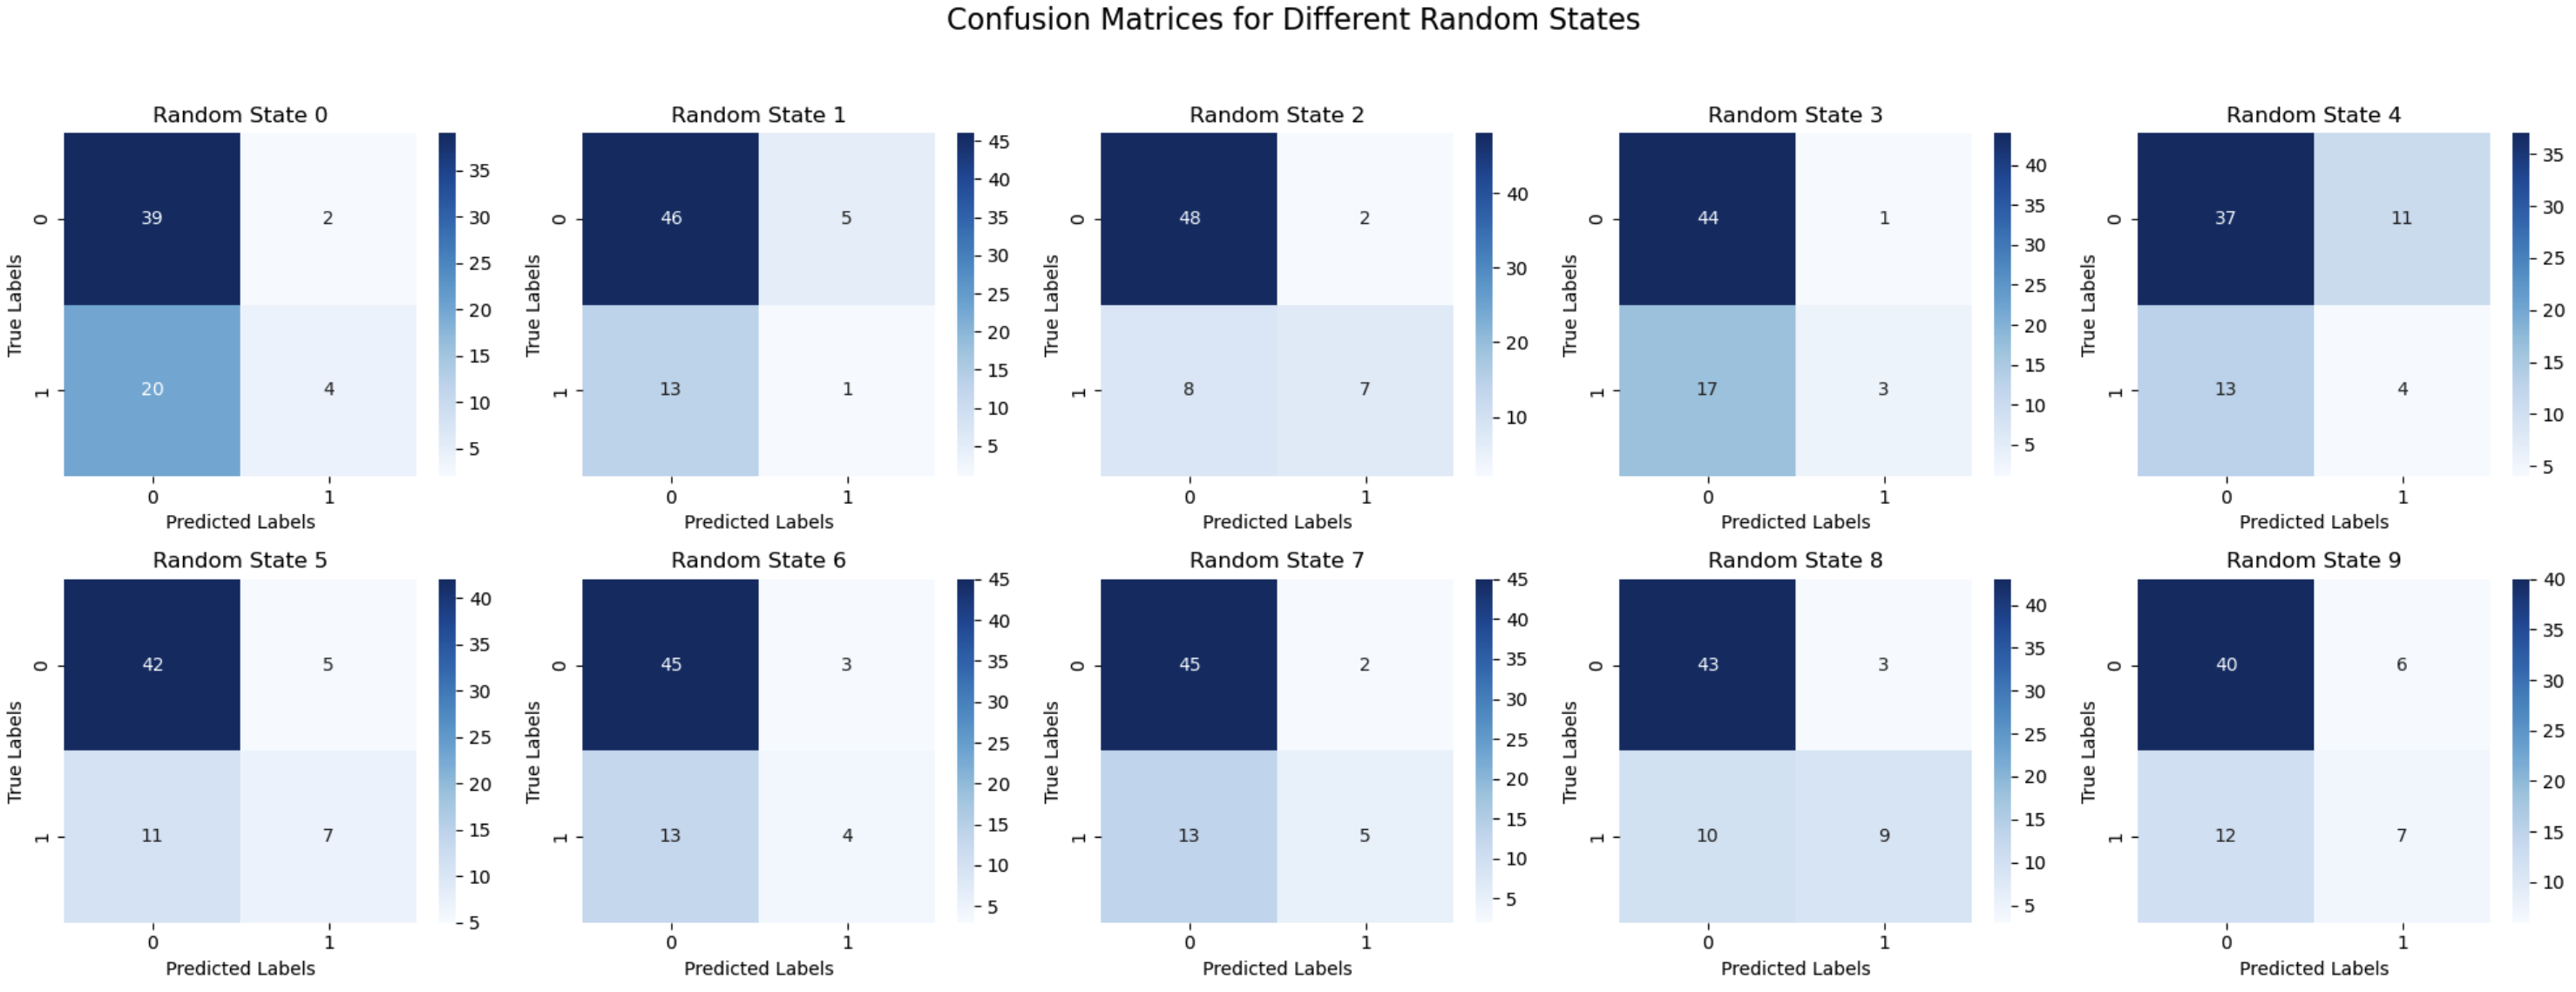

We can find that in some random states, the confusion matrix shows that the model's prediction performance on the test set is not very good, so the model performance may not actually be as good as Classification 1c.

In particular, the number of times a positive class is predicted to be a negative class fluctuates greatly:
- If the number of positive samples in `'editors_choice'` is much smaller than the number of negative samples, even small changes may cause significant fluctuations in prediction performance.
- The features used may not have enough discriminative power for positive samples, resulting in different data partitions (random states) that will make the model's performance in capturing positive samples very different.
- Insufficient model generalization ability
- The randomness of data partitioning may cause the features learned by the model to be very different on different training sets, especially when the data set is small or there are fewer samples in certain categories.

### Classification 2a

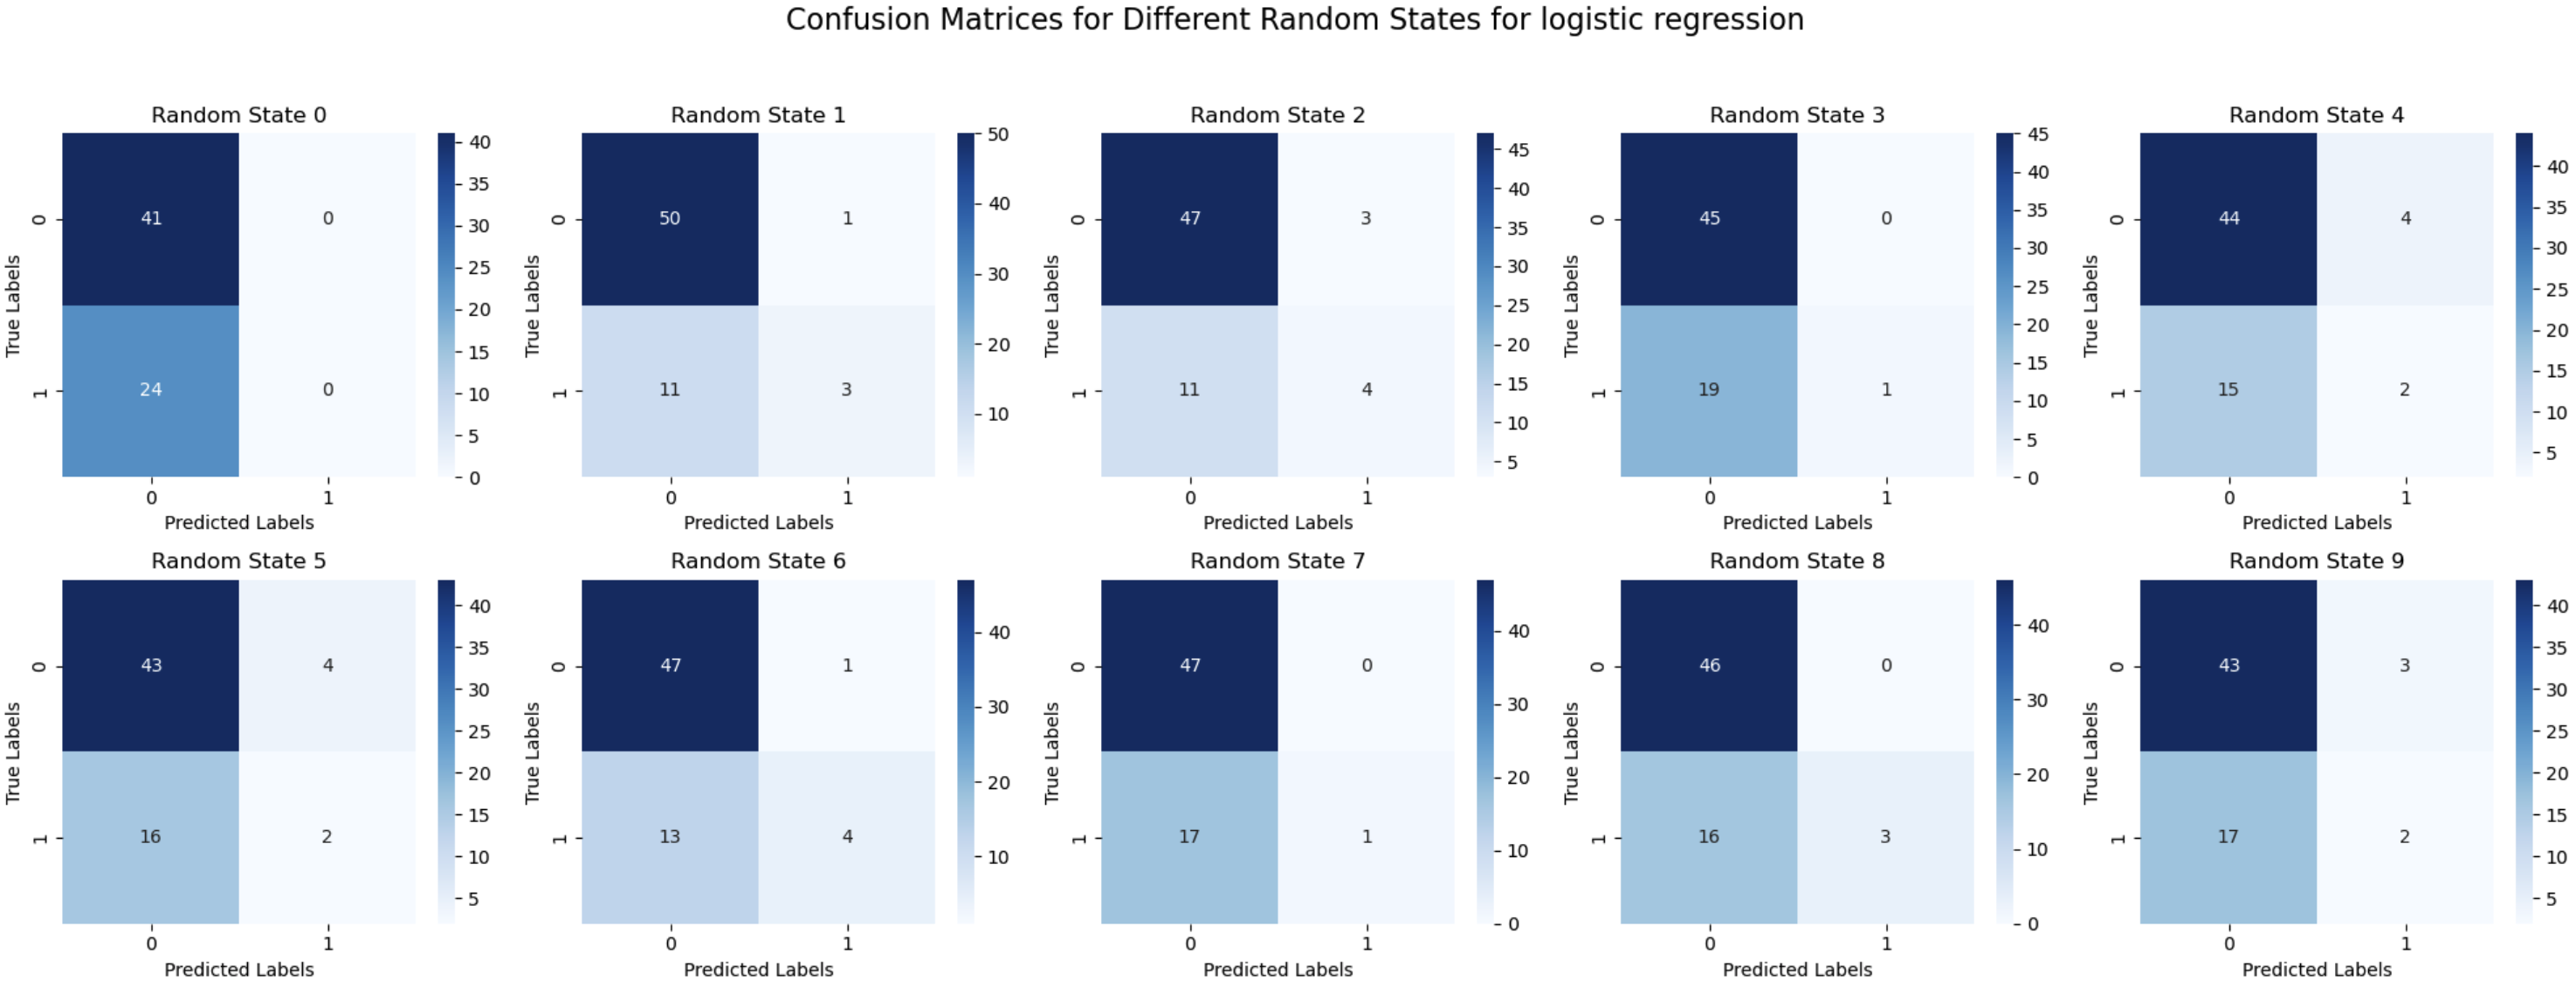

The performance of the logistic regression model, with `the average accuracy: 72.67%`, is significantly improved compared to the decision tree:
- Especially the ability to identify negative classes is very good
- But the ability to identify positive classes has not been significantly improved

Explained to a certain extent: If the number of positive samples in `'editors_choice'` is much smaller than the number of negative samples, even small changes may cause significant fluctuations in prediction performance.

### Classification 3

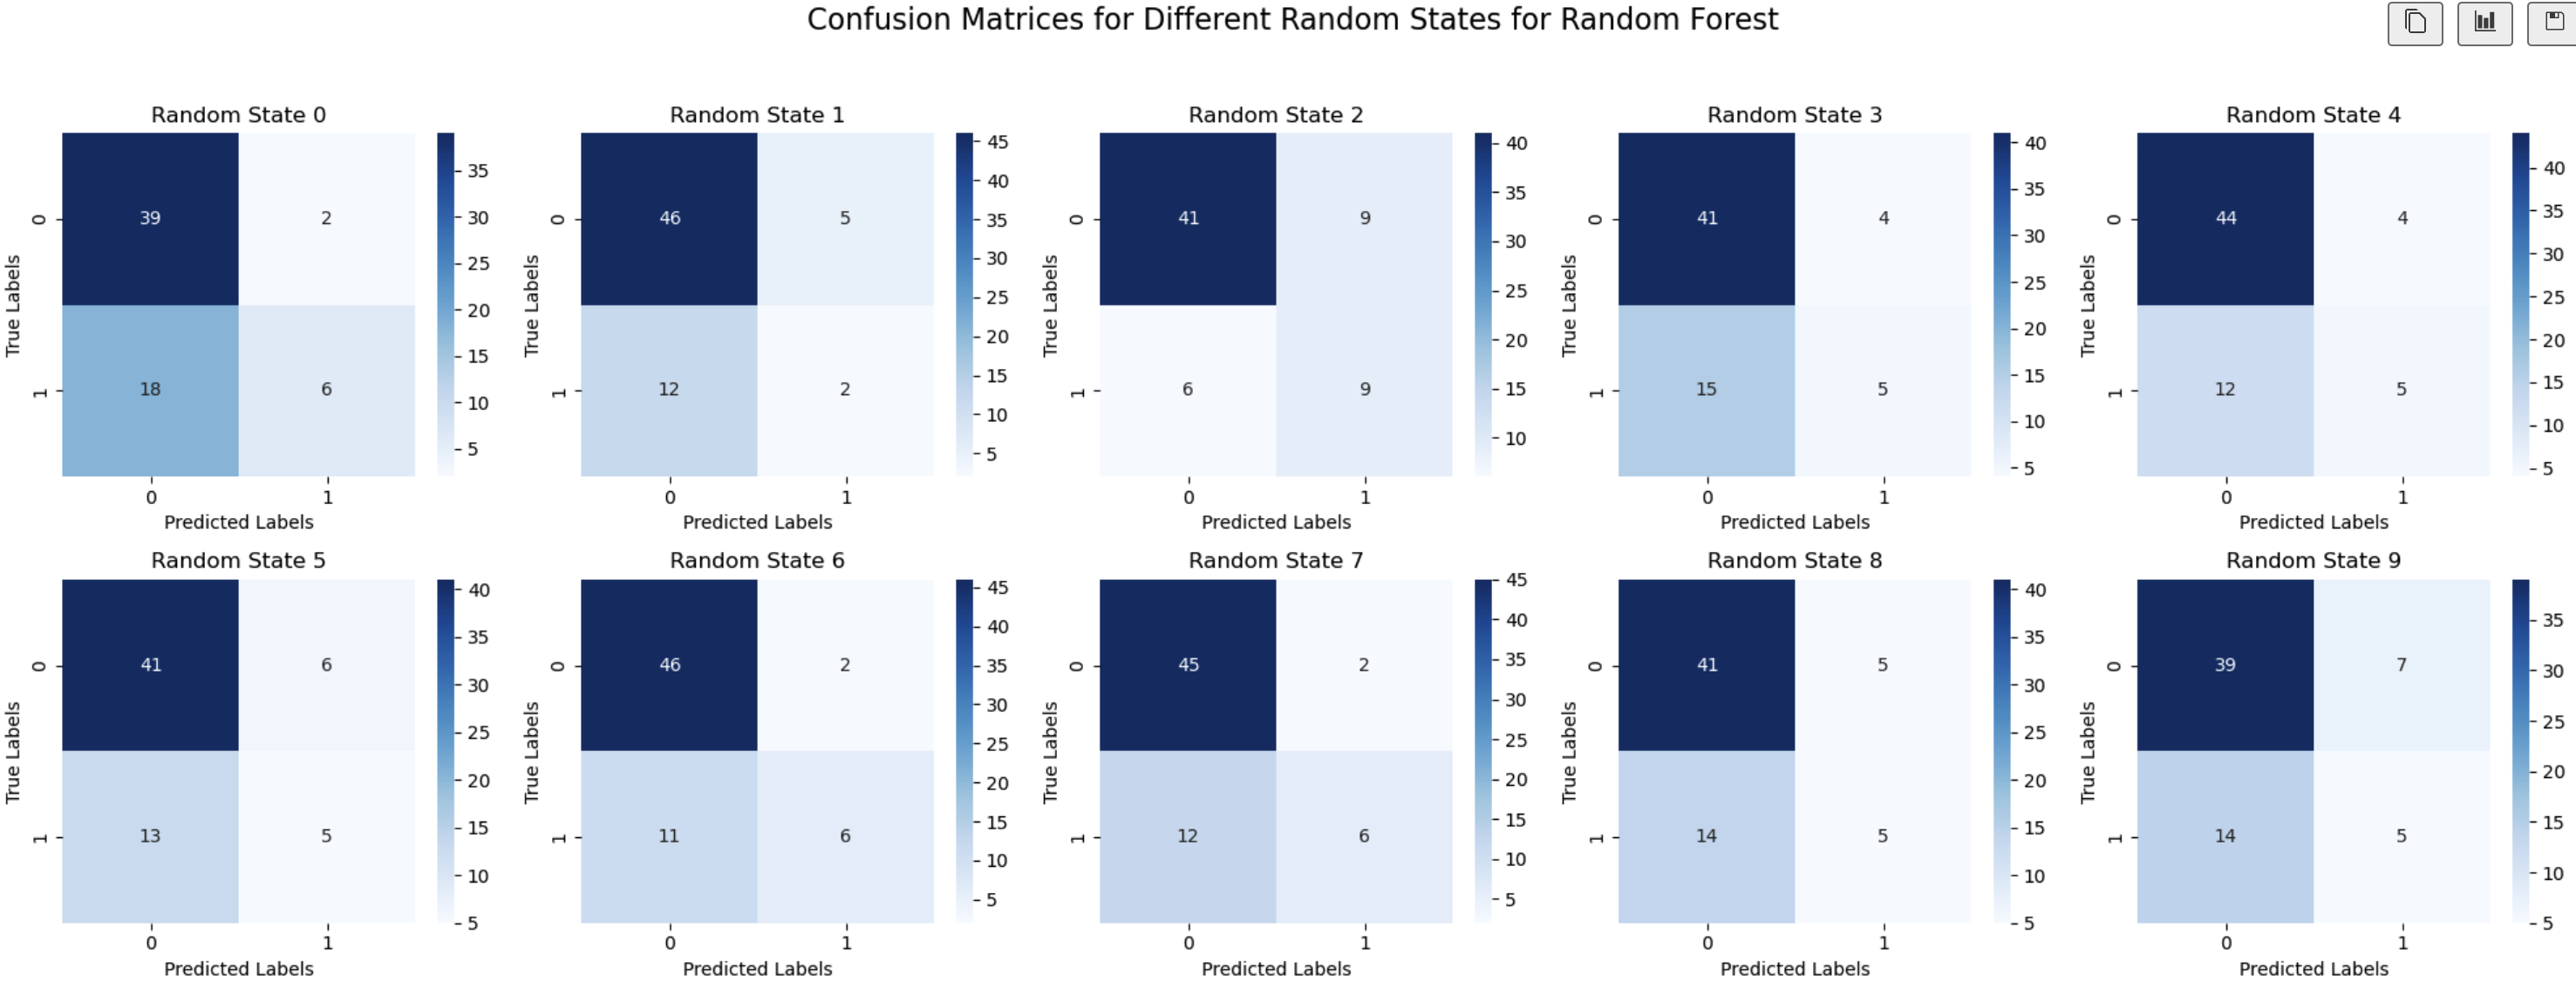

Random forest and logistic regression have similar confusion matrices and predictive performance, with `the average accuracy: 73.21%`.

### Classification 4a

- `Random Forest: 73.21%`
- `Logistic regression: 72.67%`
- `Decision tree: 62.33%`

Based on this, I would choose Random Forest. Although Random Forest and Logistic Regression have similar accuracy levels, we can see from the graph above that Random Forest performs better in predicting `'editors_choice' = 1`.

This is a difficulty for doing classification for this dataset(more '0' in 'editors_choice'), and Random Forest addresses it more effectively.